In [82]:
import numpy as np
import matplotlib.pyplot as plt
import zarr

zarr_path = '/nrs/flynp/EASI-FISH_NP_SS_OMEZarr/NP11_R3_20240513/NP11_R3_3_5_SS69117_AstA_546_AstC_647_150x_Central.zarr/0'
store = zarr.DirectoryStore(zarr_path)
root = zarr.open(store, mode='r')

multiscale = root['/'].attrs['multiscales'][0]
print(multiscale)

dataset = multiscale['datasets'][-1]
print(dataset)
path = dataset['path']

time_series = root[path]
image_data = time_series[0] # TCZYX

print(image_data.shape)

# Assuming image_data is of shape (C, Z, Y, X) where C is the number of channels
num_channels = image_data.shape[0]
num_slices = image_data.shape[1]  # This is the Z-axis size
height = image_data.shape[2]      # Y dimension
width = image_data.shape[3]       # X dimension

# Initialize an array to hold the MIP images with shape (C, T, X, Y)
# For this context, T is equivalent to the number of channels
mip_images = np.empty((num_channels, 1, height, width), dtype=image_data.dtype)
mip_image_list = []

for c in range(num_channels):
    channel_data = image_data[c, :, :, :]  # Extract the data for channel c
    mip_image = np.max(channel_data, axis=0)  # Perform the MIP across Z-axis
    mip_image_list.append(mip_image)
    mip_images[c, 0, :, :] = mip_image 

print(mip_images.shape)

# # Combine the MIP images into a single RGB image
# combined_mip_image = np.stack(mip_image_list, axis=-1)  # Stack channels along the last dimension

# # Display the image
# plt.imshow(combined_mip_image)
# plt.axis('off')
# plt.show()

{'metadata': {'method': 'loci.common.image.SimpleImageScaler', 'version': 'Bio-Formats 7.2.0'}, 'axes': [{'name': 't', 'type': 'time'}, {'name': 'c', 'type': 'channel'}, {'unit': 'micrometer', 'name': 'z', 'type': 'space'}, {'unit': 'micrometer', 'name': 'y', 'type': 'space'}, {'unit': 'micrometer', 'name': 'x', 'type': 'space'}], 'name': '', 'datasets': [{'path': '0', 'coordinateTransformations': [{'scale': [1.0, 1.0, 0.389517373327134, 0.15530748912832945, 0.15530748912832945], 'type': 'scale'}]}, {'path': '1', 'coordinateTransformations': [{'scale': [1.0, 1.0, 0.389517373327134, 0.3106149782566589, 0.3106149782566589], 'type': 'scale'}]}, {'path': '2', 'coordinateTransformations': [{'scale': [1.0, 1.0, 0.389517373327134, 0.6212299565133178, 0.6212299565133178], 'type': 'scale'}]}, {'path': '3', 'coordinateTransformations': [{'scale': [1.0, 1.0, 0.389517373327134, 1.2424599130266356, 1.2424599130266356], 'type': 'scale'}]}], 'version': '0.4'}
{'path': '3', 'coordinateTransformations'

(4, 1, 240, 240)


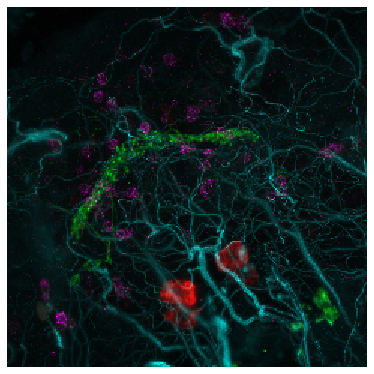

In [83]:
import numpy as np
import skimage.io
from microfilm.microplot import microshow

print(mip_images.shape)
microim = microshow(
    images=mip_images[:,0,:,:],
    fig_scaling=5,
    cmaps=['pure_green','pure_red', 'pure_magenta', 'pure_cyan'])
    #unit='um', scalebar_size_in_units=1, scalebar_unit_per_pix=0.065, scalebar_font_size=14,
    #label_text='A', label_font_size=0.02)
